In [1]:
import pandas as pd
from sqlalchemy import create_engine
# !pip install psycopg2
# !pip install plotly

# Connection string (replace with your actual credentials)
username = 'postgres'
password = 'postgres'
host = 'localhost'
port = '5432'
database = 'hp_db'

# Create connection string and engine
connection_string = f'postgresql://{username}:{password}@{host}:{port}/{database}'
engine = create_engine(connection_string)

# Define your SQL query
sql_query = 'SELECT * FROM house'  # Replace with your query

# Use Pandas to execute the SQL query and return the result as a DataFrame
house_df = pd.read_sql(sql_query, engine)

# Display the DataFrame
house_df

,house_id,founder,mascot,colors,common_room
0,Gryffindor,Godric Gryffindor,lion,Scarlet and gold,Gryffindor Tower
1,Hufflepuff,Helga Hufflepuff,badger,Yellow and black,Hufflepuff Basement
2,Ravenclaw,Rowena Ravenclaw,eagle,Blue and bronze,Ravenclaw Tower
3,Slytherin,Salazar Slytherin,snake,Green and silver,Slytherin Dungeon


In [2]:
import pandas as pd
from sqlalchemy import create_engine
# !pip install psycopg2

# Connection string (replace with your actual credentials)
username = 'postgres'
password = 'postgres'
host = 'localhost'
port = '5432'
database = 'hp_db'

# Create connection string and engine
connection_string = f'postgresql://{username}:{password}@{host}:{port}/{database}'
engine = create_engine(connection_string)

# Define your SQL query
sql_query = 'SELECT * FROM characters'  # Replace with your query

# Use Pandas to execute the SQL query and return the result as a DataFrame
characters_df = pd.read_sql(sql_query, engine)

# Display the DataFrame
characters_df

,id,name,gender,house,wand,patronus,blood_status,birthdate
0,1,Harry James Potter,Male,Gryffindor,11 Holly phoenix feather,Stag,Half-blood,July 1980
1,2,Ronald Bilius Weasley,Male,Gryffindor,12 Ash unicorn tail hair,Jack Russell terrier,Pure-blood,March 1980
2,3,Hermione Jean Granger,Female,Gryffindor,10¾ vine wood dragon heartstring,Otter,Muggle-born,September 1979
3,4,Albus Percival Wulfric Brian Dumbledore,Male,Gryffindor,15 Elder Thestral tail hair core,Phoenix,Half-blood,August 1881
4,5,Rubeus Hagrid,Male,Gryffindor,16 Oak unknown core,None,Part-Human (Half-giant),December 1928
...,...,...,...,...,...,...,...,...
135,136,Wilhelmina Grubbly-Plank,Female,None,Unknown,Non-corporeal,None,None
136,137,Fenrir Greyback,Male,None,Unknown,None,None,None
137,138,Gellert Grindelwald,Male,None,"15, Elder, Thestral tail hair core",None,Pure-blood or half-blood,None
138,139,Dobby,Male,None,None,None,None,June None


In [3]:
print(characters_df.columns)

Index(['id', 'name', 'gender', 'house', 'wand', 'patronus', 'blood_status',
       'birthdate'],
      dtype='object')


In [4]:
gender_counts = characters_df['gender'].value_counts()
gender_counts.columns = ['gender', 'count']
gender_counts

gender
Male      90
Female    49
Name: count, dtype: int64

In [5]:
query = "SELECT * FROM house;"
house = pd.read_sql(query, engine)
house

,house_id,founder,mascot,colors,common_room
0,Gryffindor,Godric Gryffindor,lion,Scarlet and gold,Gryffindor Tower
1,Hufflepuff,Helga Hufflepuff,badger,Yellow and black,Hufflepuff Basement
2,Ravenclaw,Rowena Ravenclaw,eagle,Blue and bronze,Ravenclaw Tower
3,Slytherin,Salazar Slytherin,snake,Green and silver,Slytherin Dungeon


In [6]:
# Query to find the house colors for Hannah Abbott
query = """
SELECT c.name, h.colors
FROM house h
JOIN characters c ON h.house_id = c.house
WHERE c.name = 'Hannah Abbott';
"""

# Run the query using the engine
colors = pd.read_sql(query, engine)

# Display the result
colors

,name,colors
0,Hannah Abbott,Yellow and black


In [7]:
# Query to find the common room for Molly Weasley's house
query = """
SELECT c.name, h.common_room
FROM house h
JOIN characters c ON h.house_id = c.house
WHERE c.name = 'Molly Weasley';
"""

# Run the query using the engine
common_room = pd.read_sql(query, engine)

# Display the result
common_room

,name,common_room
0,Molly Weasley,Gryffindor Tower


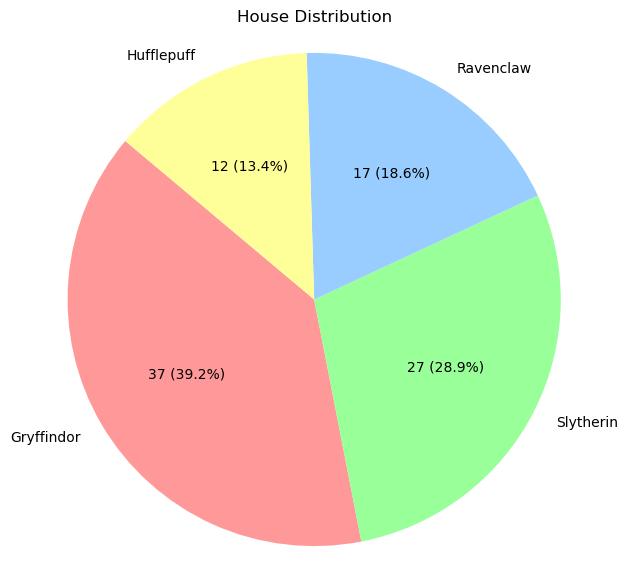

In [11]:
import matplotlib.pyplot as plt

house_counts = characters_df['house'].value_counts()

# Define lighter, pastel colors for each house
house_colors = {
    'Gryffindor': '#ff9999',  # Light Red
    'Hufflepuff': '#ffff99',  # Light Yellow
    'Ravenclaw': '#99ccff',  # Light Blue
    'Slytherin': '#99ff99'   # Light Green
}

# Assign colors to the pie chart based on house
colors = [house_colors.get(house, '#d3d3d3') for house in house_counts.index]  # Default to light gray if no house match

# Define a function to format the labels with both count and percentage
def func(pct, allvalues):
    absolute = int(pct / 100.*sum(allvalues))  # Get the count
    return f"{absolute} ({pct:.1f}%)"  # Format as count (percentage)

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(house_counts, labels=house_counts.index, autopct=lambda pct: func(pct, house_counts), startangle=140, colors=colors)
plt.title('House Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Save the output as a PNG file
plt.savefig('house_distribution.png', format='png')
plt.show()

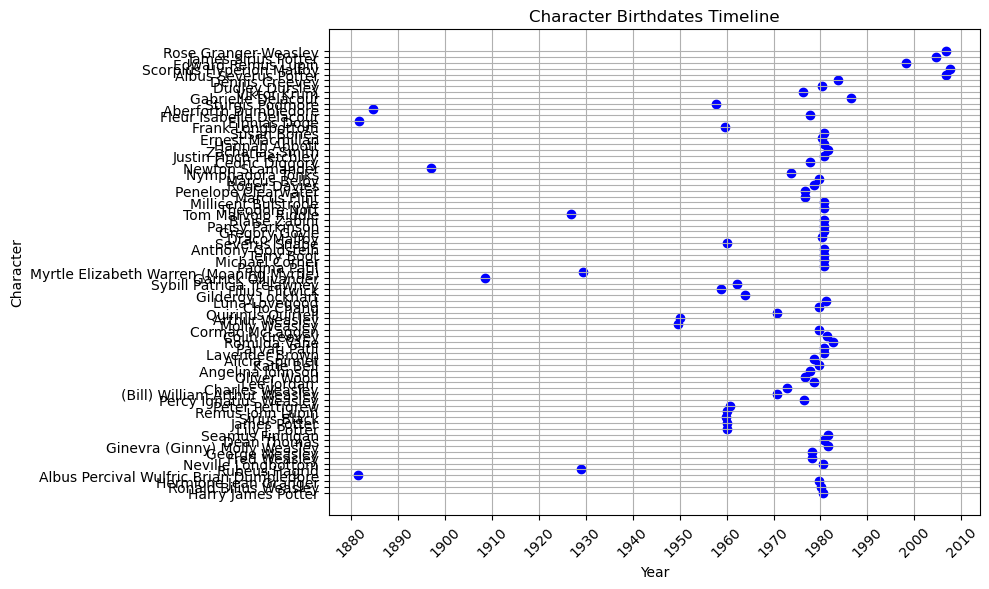

In [9]:
import matplotlib.dates as mdates
from datetime import datetime

def parse_birthdate(birthdate_str):
    try:
        return pd.to_datetime(birthdate_str, errors='coerce', format='%B %Y')
    except Exception as e:
        return pd.NaT  # Return NaT if the date is invalid

# Apply the parsing function to the 'birthdate' column
characters_df['birthdate'] = characters_df['birthdate'].apply(parse_birthdate)

# Drop rows where birthdate is missing or invalid
characters_df_cleaned = characters_df.dropna(subset=['birthdate'])

# Create the timeline plot
plt.figure(figsize=(10, 6))

# Plot the birthdates as scatter points on the timeline
plt.scatter(characters_df_cleaned['birthdate'], characters_df_cleaned['name'], color='blue', label='Character Birthdate')

# Formatting the plot
plt.title('Character Birthdates Timeline')
plt.xlabel('Year')
plt.ylabel('Character')
plt.xticks(rotation=45)
plt.grid(True)

# Set the x-axis to display the dates in a readable format
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))  # Tick every 10 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

def parse_birthdate(birthdate_str):
    try:
        return pd.to_datetime(birthdate_str, errors='coerce', format='%B %Y')
    except Exception as e:
        return pd.NaT

characters_df['birthdate'] = characters_df['birthdate'].apply(parse_birthdate)
characters_df_cleaned = characters_df.dropna(subset=['birthdate'])

# Add a constant y-value to align all points on one line
characters_df_cleaned['y'] = 0

# Create the plot
fig = px.scatter(
    characters_df_cleaned,
    x='birthdate',
    y='y',
    hover_name='name',
    title='Character Birthdates Timeline',
    labels={'y': ''},
)

# Update layout to remove y-axis ticks and labels
fig.update_layout(
    yaxis=dict(showticklabels=False),
    xaxis_title='Year',
    hovermode='closest',
    height=400
)

# Show plot
fig.show()



C:\Users\jenn2\AppData\Local\Temp\ipykernel_19916\2865096113.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  characters_df_cleaned['y'] = 0


<Figure size 640x480 with 0 Axes>